In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm, trange
tqdm.pandas()

sns.set(style="white")

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('data_cleaned.csv')
print(data.shape)
data.head()

(337144, 8)


,clean_text,positive,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,haha guy bunch loser,0,0,1,0,0,0,1
1,tty comment,0,0,0,1,0,0,1
2,ridiculous guy called protester armed threat v...,0,0,1,0,0,0,1
3,muslim act pilloried okay smear entire religio...,0,1,1,0,0,0,1
4,bitch nut read book woman,0,0,1,1,0,0,1


In [3]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(336740, 8)


In [4]:
labels= ['positive', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True)

vects = vectorizer.fit_transform(data['clean_text'])
target = data[labels].values

In [6]:
print('X shape', vects.shape)
print('Y shape', target.shape)

X shape (336740, 246693)
Y shape (336740, 7)


In [7]:
from utils.ml import train_model_one_vs_rest

Using TensorFlow backend.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


Mean roauc 0.8715 +- 0.0029
Mean f1 0.81 +- 0.0021
Mean accuracy 0.745 +- 0.0023


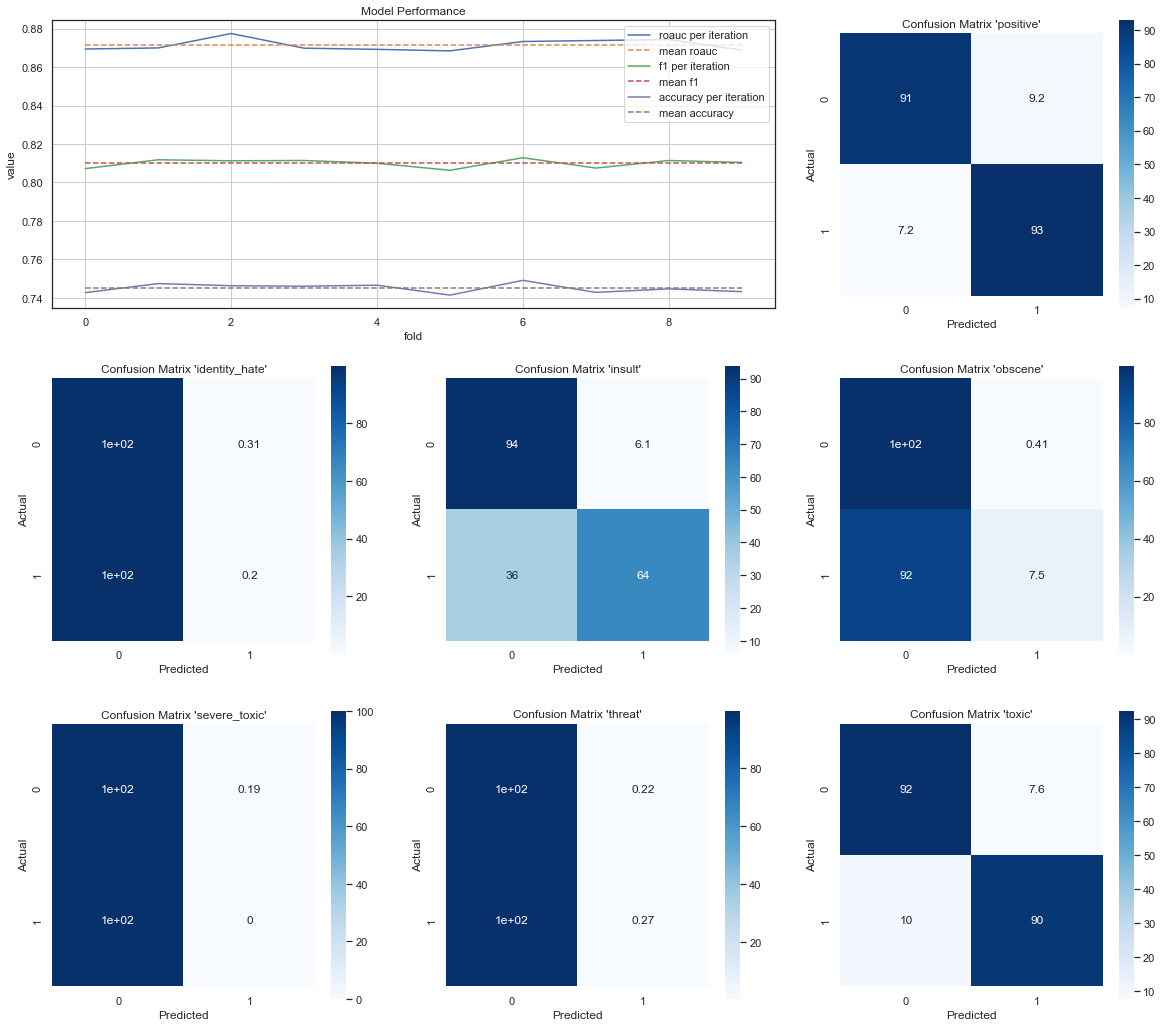

In [9]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_one_vs_rest(model, vects, target, labels)
print('Mean roauc', round(np.mean(mnb_performance['roauc']), 4), '+-', round(np.std(mnb_performance['roauc']), 4))
print('Mean f1', round(np.mean(mnb_performance['f1']), 4), '+-', round(np.std(mnb_performance['f1']), 4))
print('Mean accuracy', round(np.mean(mnb_performance['accuracy']), 4), '+-', round(np.std(mnb_performance['accuracy']), 4))


Mean roauc 0.9745 +- 0.0007
Mean f1 0.8926 +- 0.0014
Mean accuracy 0.7812 +- 0.0023


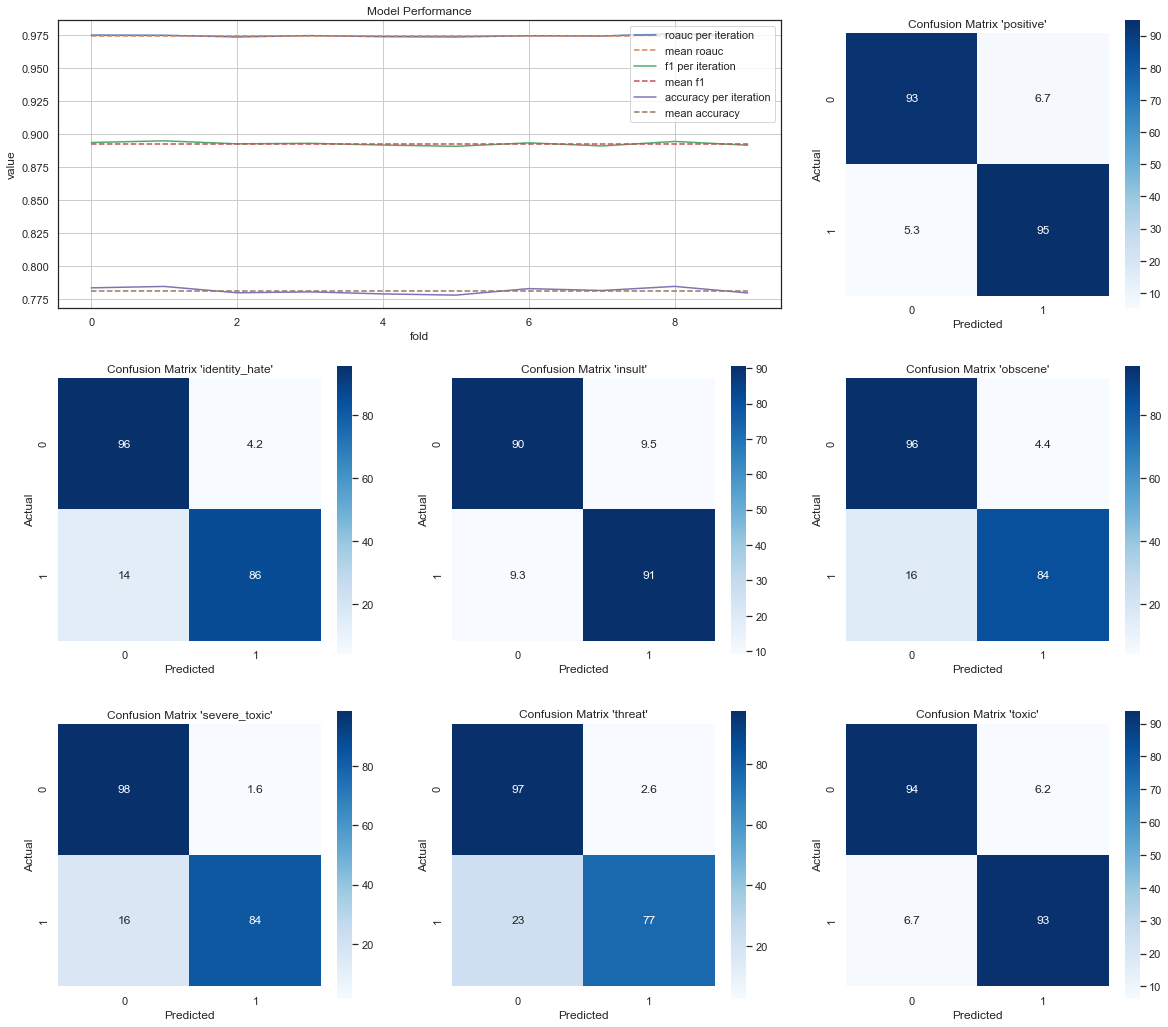

In [10]:
model = LogisticRegression(class_weight='balanced', random_state=19, max_iter=1_00_000)
lr_performance, lr_cm, lr_model = train_model_one_vs_rest(model, vects, target, labels)
print('Mean roauc', round(np.mean(lr_performance['roauc']), 4), '+-', round(np.std(lr_performance['roauc']), 4))
print('Mean f1', round(np.mean(lr_performance['f1']), 4), '+-', round(np.std(lr_performance['f1']), 4))
print('Mean accuracy', round(np.mean(lr_performance['accuracy']), 4), '+-', round(np.std(lr_performance['accuracy']), 4))

In [11]:
import pickle

In [12]:
pickle.dump(lr_model, open('LR-OneVsRest.pkl', 'wb'))